## Install dependencies

In [1]:
%pip install matplotlib
%pip install pandas
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Read Data

In [2]:

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

results = pd.read_csv("results.csv")

## Helper functions

In [3]:

def string_to_number(number_string: str):
    number_string = number_string.strip()

    try:
        return int(number_string)
    except:
        pass

    return None

closed_question_serializer = lambda ans: ans=="Sí"

def range_question_serialize(ans: str):
    result = 0
    if ans == "Rara vez":
        result = -2
    elif ans == "A veces":
        result = -1
    elif ans == "Frecuentemente":
        result = 1
    elif ans == "Siempre":
        result = 2

    return result

def range_question_serialize_authority(ans: str):
    result = 0
    if ans == "Nada efectiva":
        result = -2
    elif ans == "Poca efectiva":
        result = -1
    elif ans == "Algo efectiva":
        result = 1
    elif ans == "Muy efectiva":
        result = 2

    return result

def string_list_serializer(ans: str):
    return ans.split(";")

## Change column names

In [4]:

new_name_columns = [
    "date",
    "age",
    "gender",
    "has_access_smartphone",
    "would_use_app",
    "uses_social_mobile_apps",
    "years_lived_in_dimitrov",
    "frequency_security_problems_dimitrov",
    "frequency_waste_problems_dimitrov",
    "security_problems",
    "waste_problems",
    "knows_where_report",
    "are_authorities_efective",
    "likes_features_app"
]

results.columns = new_name_columns

## Serialize Data

In [5]:

results["date"] = results["date"].apply(lambda ds: datetime.strptime(ds[:-4], "%Y/%m/%d %I:%M:%S %p"))

# there are some ages that does not include only digits so i will omit those
results["age"] = results["age"].apply(string_to_number)

print(results.isna().sum())
results["gender"] = results["gender"].apply(lambda gs: gs=="Masculinos")
results["has_access_smartphone"] = results["has_access_smartphone"].apply(closed_question_serializer)
results["would_use_app"] = results["would_use_app"].apply(lambda ws: 1 if ws == "Sí" else (0 if ws == "Tal vez" else -1) )
results["uses_social_mobile_apps"] = results["uses_social_mobile_apps"].apply(closed_question_serializer)

# drop years_lived_in_dimitrov because the data has too much noise
results.drop("years_lived_in_dimitrov", axis=1, inplace=True)

results["frequency_security_problems_dimitrov"] = results["frequency_security_problems_dimitrov"].apply(range_question_serialize)
results["frequency_waste_problems_dimitrov"] = results["frequency_waste_problems_dimitrov"].apply(range_question_serialize)
results["security_problems"] = results["security_problems"].apply(string_list_serializer)
results["waste_problems"] = results["waste_problems"].apply(string_list_serializer)
results["knows_where_report"] = results["knows_where_report"].apply(closed_question_serializer)

results["likes_features_app"] = results["likes_features_app"].apply(string_list_serializer)


date                                    0
age                                     4
gender                                  0
has_access_smartphone                   0
would_use_app                           0
uses_social_mobile_apps                 0
years_lived_in_dimitrov                 0
frequency_security_problems_dimitrov    0
frequency_waste_problems_dimitrov       0
security_problems                       0
waste_problems                          0
knows_where_report                      0
are_authorities_efective                0
likes_features_app                      0
dtype: int64


## Generate graphs

In [6]:
frequency_problems_labels = {
    -2: "Rara vez",
    -1: "A veces",
    0: "Nunca",
    1: "Frecuentemente",
    2: "Siempre"
}

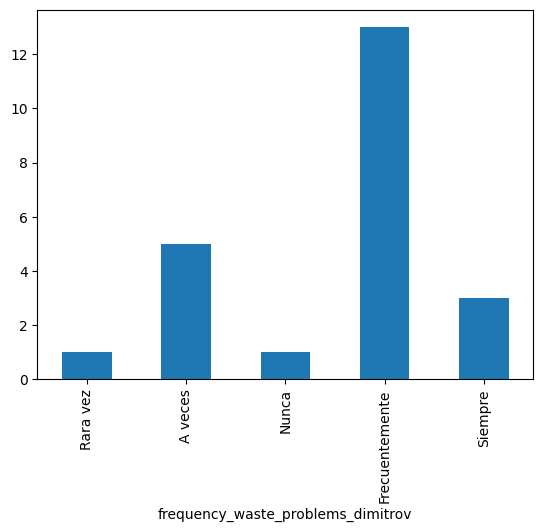

<Figure size 640x480 with 0 Axes>

In [7]:
waste_problems_plot = results.groupby("frequency_waste_problems_dimitrov")["frequency_waste_problems_dimitrov"].count()
waste_problems_plot = waste_problems_plot.rename(index=frequency_problems_labels)
waste_problems_plot = waste_problems_plot.plot(kind="bar")
plt.show()
plt.clf()

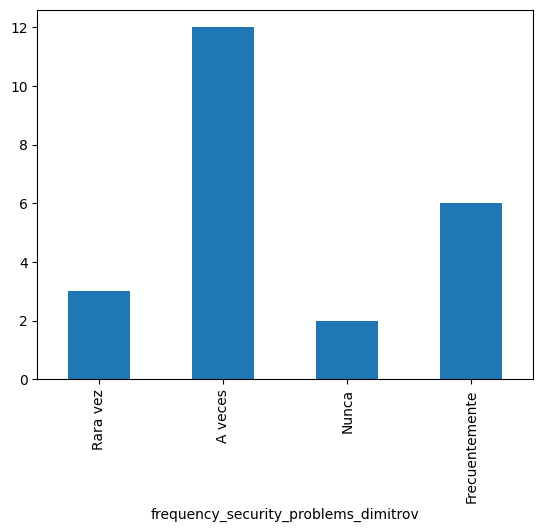

<Figure size 640x480 with 0 Axes>

In [8]:
security_problems_plot = results.groupby("frequency_security_problems_dimitrov")["frequency_security_problems_dimitrov"].count()
security_problems_plot = security_problems_plot.rename(index=frequency_problems_labels)
security_problems_plot = security_problems_plot.plot(kind="bar")
plt.show()
plt.clf()



## Save Serialized Data

In [9]:
results["date"].apply(datetime.date)
results.to_csv("output/serialized_results.csv", index=False)


spanish_results = results.rename(columns={
    "date": "fecha",
    "age": "edad",
    "gender": "genero",
    "has_access_smartphone": "tiene_acceso_smartphone",
    "would_use_app": "usaria_app",
    "uses_social_mobile_apps": "usa_apps_sociales",
    "years_lived_in_dimitrov": "anios_en_dimitrov",
    "frequency_security_problems_dimitrov": "frecuencia_problemas_seguridad",
    "frequency_waste_problems_dimitrov": "frecuencia_problemas_basura",
    "security_problems": "tipos_problemas_seguridad",
    "waste_problems": "tipos_problemas_basura",
    "knows_where_report": "sabe_donde_reportar",
    "are_authorities_efective": "autoridades_efectivas",
    "likes_features_app": "funciones_deseadas_app"
})
spanish_results.to_csv("output/datos_serializados.csv")
spanish_results.to_excel("output/datos_serializados.xlsx")

